***

# Fraud Detection using Random Forest

*Posted on October 2022*

***

In this notebook I would like to implement fraud detection using random forest as its framework. The data I will use is provided by Aman Chauhan in this link: https://www.kaggle.com/datasets/whenamancodes/fraud-detection.

The data consist of 31 columns with one column act as a class, one column is how long it takes for the user to input, and the other 29 is an output of a PCA transformation. Unfortunately, due to confidentiality the source cant provided any further information about the output of a PCA.

First thing to do is load the data and look for any pattern

In [1]:
import pandas as pd
import seaborn as sb

In [2]:
path_data = '../input/fraud-detection/creditcard.csv'

df = pd.read_csv(path_data)

In [3]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

As we can see there are no missing values on the data

<AxesSubplot:xlabel='Class', ylabel='Time'>

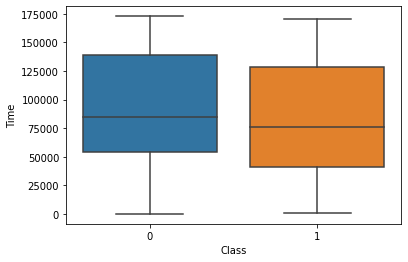

In [6]:
sb.boxplot(data=df, x="Class", y="Time")

Here we can see that between an input that considered a fraud and non-fraud, there is no particular difference in time features. With this in mind, I then remove time features from our detection model

<AxesSubplot:xlabel='Class', ylabel='Amount'>

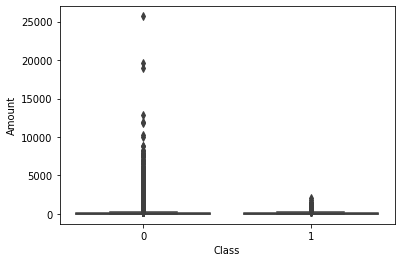

In [7]:
sb.boxplot(data=df, x="Class", y="Amount")

Here is the same boxplot analysis but for different feature which is amount. Visually, we can a clear different between fraud and non-fraud input.

In [8]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

The dataset is considered unbalanced because there are 284315 non-fraud data while there are only 492 data that can be considered as fraud. With this in mind, I will incorporate weighting to the random forest model.

In [9]:
y = df['Class']
X = df.drop(['Class', 'Time'], axis=1)

Next, I divide the data into training and test data

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

Our amount feature is still in the range that is not the same as any other features, so we need to scale this feaure.

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler

column_trans = ColumnTransformer(
    [('Scaler', RobustScaler(), X_train.columns)])

X_train = column_trans.fit_transform(X_train)
X_test = column_trans.transform(X_test)

I use grid search to find the best parameter for the model

In [12]:
# grid search
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

scorer = make_scorer(f1_score)

params = {"criterion": ["gini", "entropy"],
          "max_depth": [8, 4],
          "class_weight": ["balanced", "balanced_subsample"]
          }

grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, error_score='raise', scoring=scorer)
grid.fit(X_train, y_train.values)
print(grid.best_score_)
print(grid.best_estimator_)

0.8472833881463154
RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=8)


The best parameter for the random forest model turn out to be 8 depth random forest, with entropy as its criterion and balanced subsample to weight the unbalance dataset

Lets use this parameter as our parameter in the actual model

In [13]:
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline

# define the model
model = Pipeline([('RandomForest', RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',max_depth=8)),
                  ])
model.fit(X_train, y_train)
# predict on test set
yhat = model.predict(X_test)
# evaluate predictions
f1 = f1_score(y_test, yhat)
print('F1 score: {}'.format(f1))

F1 score: 0.8169014084507041


This give us a fraud detection model with F1 score of about 0.81

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93839
           1       0.85      0.78      0.82       148

    accuracy                           1.00     93987
   macro avg       0.93      0.89      0.91     93987
weighted avg       1.00      1.00      1.00     93987



<AxesSubplot:>

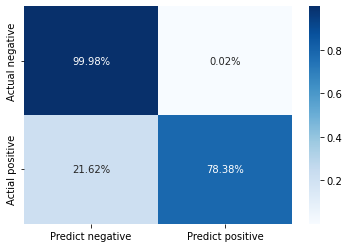

In [15]:
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, yhat))
cm.columns = ['Predict negative', 'Predict positive']
cm.index = ['Actual negative', 'Actial positive']
cm.iloc[0] = cm.iloc[0]/cm.sum(axis=1)[0]
cm.iloc[1] = cm.iloc[1]/cm.sum(axis=1)[1]

sb.heatmap(cm, annot=True, cmap='Blues', fmt='.2%')

The performance of the model can also be viewed as a confusion matrix. As you can see the model successfully predict 99.98% of the non-fraud data and 78.38% of the fraud data.